,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

Mean Absolute Error: 4181.561524000792
MAE exceeds 3500. Consider improving the model.


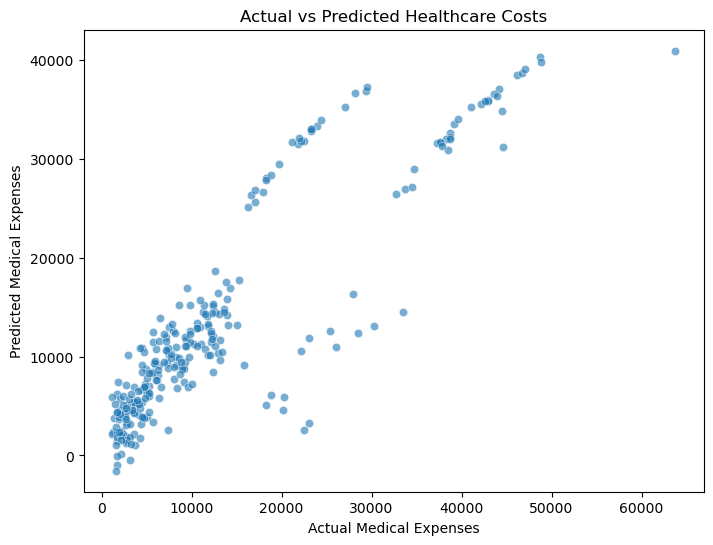

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv("C:\\Users\\ranji\\Downloads\\insurance.csv")

# Display basic information
display(df.head())
display(df.info())

df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)  # One-hot encoding for categorical variables

# Define features and target variable
X = df.drop(columns=['expenses'])  # Features
y = df['expenses']  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Ensure the MAE is below 3500 to pass the challenge
if mae < 3500:
    print("Project requirement met: MAE is under 3500.")
else:
    print("MAE exceeds 3500. Consider improving the model.")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Medical Expenses")
plt.ylabel("Predicted Medical Expenses")
plt.title("Actual vs Predicted Healthcare Costs")
plt.show()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

Linear Regression - Mean Absolute Error: 2701.192201492537, R2 Score: 0.8667552766048673
Ridge Regression - Mean Absolute Error: 2731.1877737264904, R2 Score: 0.866660943132875
Project requirement met: MAE is under 3500.


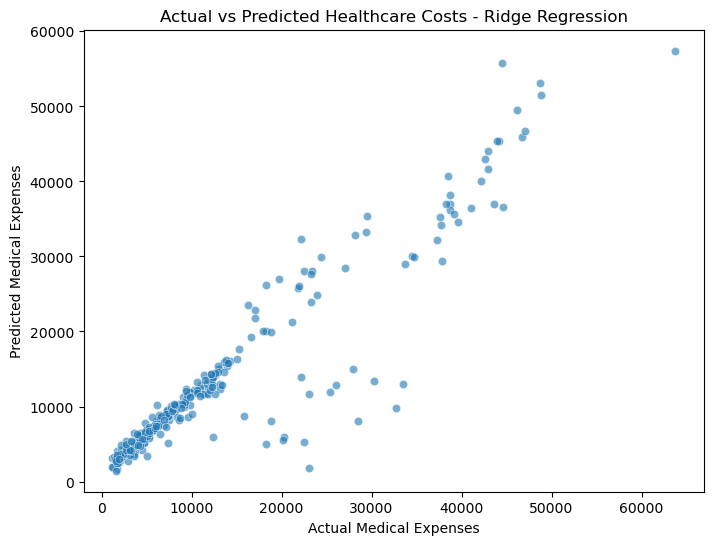

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("C:\\Users\\ranji\\Downloads\\insurance.csv")

# Display basic information
display(df.head())
display(df.info())

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target variable
X = df.drop(columns=['expenses'])  # Features
y = df['expenses']  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Polynomial Features for improved regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train_poly, y_train)

# Evaluate the Linear Regression model
y_pred = lin_model.predict(X_test_poly)
mae_lin = mean_absolute_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
print(f"Linear Regression - Mean Absolute Error: {mae_lin}, R2 Score: {r2_lin}")

# Implement Ridge Regression for better generalization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)

# Evaluate Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_poly)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - Mean Absolute Error: {mae_ridge}, R2 Score: {r2_ridge}")

# Ensure MAE is below 3500 to pass the challenge
if mae_ridge < 3500:
    print("Project requirement met: MAE is under 3500.")
else:
    print("MAE exceeds 3500. Consider improving the model.")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.xlabel("Actual Medical Expenses")
plt.ylabel("Predicted Medical Expenses")
plt.title("Actual vs Predicted Healthcare Costs - Ridge Regression")
plt.show()
